In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys

sys.path.append("/kvh4/optic_disc/scripts") 
from training import train_dice, train_bce, train_dice_MC, run_inference, run_MC_inference
from evaluation_functions import compute_dice_dataset, \
                                    compute_mean_uncertainty_dataset, load_pred

## Generate Dataset Splits
Don't run again

In [2]:
filepath = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"
with open(os.path.join(filepath, "dataset_splits_nonglaucoma_200_100.pkl"), 'rb') as file:
    data_dict = pickle.load(file)

In [20]:
gt_dir_ng = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/ground_truth"
gt_dir_g = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/ground_truth"

In [3]:
glaucoma_image_dir = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/images"
glaucoma_images = [os.path.join(glaucoma_image_dir, g) for g in os.listdir(glaucoma_image_dir)]
glaucoma_gt_dir = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/ground_truth"
glaucoma_gt = [os.path.join(glaucoma_gt_dir, g) for g in os.listdir(glaucoma_gt_dir)]

In [22]:
def eval_mean_uncertainty(gt_dir_ng, gt_dir_g, pred_dir_training, pred_dir_test, pred_dir_g, sampling=False):
    evaluation_data_dir = dict() # contains the dice scores and everything from the three datasets 
    
    train_names = [n[-9:-4] for n in os.listdir(pred_dir_training)]
    test_names = [n[-9:-4] for n in os.listdir(pred_dir_test)]
    g_names = [n[-9:-4] for n in os.listdir(pred_dir_g)]
    
    # training data 
    res_train = compute_dice_dataset(train_names, gt_dir_ng, pred_dir_training, mode="cup", sampling=sampling)
    train_dice = np.mean(list(res_train.values()))
    unc_train = compute_mean_uncertainty_dataset(train_names, pred_dir_training, sampling=sampling)
    dice_train = list()
    ms_unc_train = list()
    for k in res_train.keys():
        dice_train.append(res_train[k])
        ms_unc_train.append(unc_train[k])
    evaluation_data_dir["train_dice"] = dice_train
    evaluation_data_dir["train_ms"] = ms_unc_train
    
    # test data 
    res_test = compute_dice_dataset(test_names, gt_dir_ng, pred_dir_test, mode="cup", sampling=sampling)
    test_dice = np.mean(list(res_test.values()))
    unc_test = compute_mean_uncertainty_dataset(test_names, pred_dir_test, sampling=sampling)
    dice_test = list()
    ms_unc_test = list()
    for k in res_test.keys():
        dice_test.append(res_test[k])
        ms_unc_test.append(unc_test[k])
    evaluation_data_dir["test_dice"] = dice_test
    evaluation_data_dir["test_ms"] = ms_unc_test
    
    # glaucoma data 
    res_g = compute_dice_dataset(g_names, gt_dir_g, pred_dir_g, mode="cup", sampling=sampling)
    g_dice = np.mean(list(res_g.values()))
    unc_g = compute_mean_uncertainty_dataset(g_names, pred_dir_g, sampling=sampling)
    dice_g = list()
    ms_unc_g = list()
    for k in res_g.keys():
        dice_g.append(res_g[k])
        ms_unc_g.append(unc_g[k])
    evaluation_data_dir["glaucoma_dice"] = dice_g
    evaluation_data_dir["glaucoma_ms"] = ms_unc_g
    
    plt.scatter(dice_train, ms_unc_train, label="training, "+str(round(train_dice, 3)))
    plt.scatter(dice_test, ms_unc_test, label="test non-glaucoma, "+str(round(test_dice, 3)))
    plt.scatter(dice_g, ms_unc_g, label="test glaucoma, "+str(round(g_dice, 3)))
    
    plt.ylabel("mean uncertainty")
    plt.xlabel("Dice score")
    plt.legend()
    
    return evaluation_data_dir

## no dropout 
### seed = 0 

In [7]:
training_params_0 = {"seed": 0, 
                   "training_images": data_dict["training_images"],
                  "training_gt": data_dict["training_gt"], 
                  "validation_images": data_dict["validation_images"],
                  "validation_gt": data_dict["validation_gt"],
                  "epoch_num": 350,
                  "model_dir": "/kvh4/optic_disc/models/10_UNet_cup_s0",
                  "p_dropout": 0.0, 
                    "learning_rate": 1e-4}

In [8]:
filepath = training_params_0["model_dir"]
if not os.path.exists(filepath):
    os.makedirs(filepath)
    
with open(os.path.join(filepath, "training_params.pkl"), 'wb') as file:
      
    # A new file will be created
    pickle.dump(training_params_0, file)

In [9]:
train_dice(**training_params_0)

----------
epoch 1/350
epoch 1 average loss: 0.9615
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_1.pth
saved model
current epoch: 1 current mean dice: 0.0403
val loss:  0.9674604809284211
----------
epoch 2/350
epoch 2 average loss: 0.9535
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_2.pth
saved model
current epoch: 2 current mean dice: 0.0588
val loss:  0.9640597802400589
----------
epoch 3/350
epoch 3 average loss: 0.9481
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_3.pth
saved model
current epoch: 3 current mean dice: 0.0746
val loss:  0.9536070108413697
----------
epoch 4/350
epoch 4 average loss: 0.9448
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_4.pth
saved model
current epoch: 4 current mean dice: 0.0748
val loss:  0.9468355429172516
----------
epoch 5/350
epoch 5 average loss: 0.9423
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_5.pth
saved model
current epoch: 5 current mean dice: 0.0824
val loss:  0.9443453907966614
-----

current epoch: 41 current mean dice: 0.2587
val loss:  0.8709675568342209
----------
epoch 42/350
epoch 42 average loss: 0.8385
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_42.pth
saved model
current epoch: 42 current mean dice: 0.2549
val loss:  0.8629186421632766
----------
epoch 43/350
epoch 43 average loss: 0.8319
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_43.pth
saved model
current epoch: 43 current mean dice: 0.2604
val loss:  0.8557099765539169
----------
epoch 44/350
epoch 44 average loss: 0.8327
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_44.pth
saved model
current epoch: 44 current mean dice: 0.2564
val loss:  0.8601037645339966
----------
epoch 45/350
epoch 45 average loss: 0.8331
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_45.pth
saved model
current epoch: 45 current mean dice: 0.2566
val loss:  0.8561663818359375
----------
epoch 46/350
epoch 46 average loss: 0.8233
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_46.p

epoch 82 average loss: 0.6902
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_82.pth
saved model
current epoch: 82 current mean dice: 0.3016
val loss:  0.7551300621032715
----------
epoch 83/350
epoch 83 average loss: 0.6901
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_83.pth
saved model
current epoch: 83 current mean dice: 0.2948
val loss:  0.7558994597196579
----------
epoch 84/350
epoch 84 average loss: 0.6861
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_84.pth
saved model
current epoch: 84 current mean dice: 0.3206
val loss:  0.7395992290973663
----------
epoch 85/350
epoch 85 average loss: 0.6960
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_85.pth
saved model
current epoch: 85 current mean dice: 0.3070
val loss:  0.758690710067749
----------
epoch 86/350
epoch 86 average loss: 0.6809
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_86.pth
saved model
current epoch: 86 current mean dice: 0.3139
val loss:  0.7503954571485519
----------

current epoch: 128 current mean dice: 0.4646
val loss:  0.6232201904058456
----------
epoch 129/350
epoch 129 average loss: 0.5892
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_129.pth
saved model
current epoch: 129 current mean dice: 0.4012
val loss:  0.6641982161998748
----------
epoch 130/350
epoch 130 average loss: 0.5862
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_130.pth
saved model
current epoch: 130 current mean dice: 0.4060
val loss:  0.6688821738958359
----------
epoch 131/350
epoch 131 average loss: 0.5886
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_131.pth
saved model
current epoch: 131 current mean dice: 0.3788
val loss:  0.6737343031167984
----------
epoch 132/350
epoch 132 average loss: 0.5831
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_132.pth
saved model
current epoch: 132 current mean dice: 0.5079
val loss:  0.6019441002607345
----------
epoch 133/350
epoch 133 average loss: 0.5852
savepath:  /kvh4/optic_disc/models/10_UNe

current epoch: 171 current mean dice: 0.6610
val loss:  0.4956632262468338
----------
epoch 172/350
epoch 172 average loss: 0.4367
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_172.pth
saved model
current epoch: 172 current mean dice: 0.6497
val loss:  0.500250329375267
----------
epoch 173/350
epoch 173 average loss: 0.4166
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_173.pth
saved model
current epoch: 173 current mean dice: 0.7193
val loss:  0.4591272485256195
----------
epoch 174/350
epoch 174 average loss: 0.4192
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_174.pth
saved model
current epoch: 174 current mean dice: 0.7226
val loss:  0.46194973945617673
----------
epoch 175/350
epoch 175 average loss: 0.4040
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_175.pth
saved model
current epoch: 175 current mean dice: 0.6683
val loss:  0.515499632358551
----------
epoch 176/350
epoch 176 average loss: 0.3907
savepath:  /kvh4/optic_disc/models/10_UNet

current epoch: 211 current mean dice: 0.8566
val loss:  0.24570854187011718
----------
epoch 212/350
epoch 212 average loss: 0.1590
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_212.pth
saved model
current epoch: 212 current mean dice: 0.8603
val loss:  0.24207849442958831
----------
epoch 213/350
epoch 213 average loss: 0.1563
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_213.pth
saved model
current epoch: 213 current mean dice: 0.8723
val loss:  0.23280908823013305
----------
epoch 214/350
epoch 214 average loss: 0.1531
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_214.pth
saved model
current epoch: 214 current mean dice: 0.8756
val loss:  0.22581290662288667
----------
epoch 215/350
epoch 215 average loss: 0.1507
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_215.pth
saved model
current epoch: 215 current mean dice: 0.8317
val loss:  0.25837584257125856
----------
epoch 216/350
epoch 216 average loss: 0.1492
savepath:  /kvh4/optic_disc/models/1

epoch 251 average loss: 0.0941
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_251.pth
saved model
current epoch: 251 current mean dice: 0.8742
val loss:  0.1761765819787979
----------
epoch 252/350
epoch 252 average loss: 0.0935
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_252.pth
saved model
current epoch: 252 current mean dice: 0.8404
val loss:  0.2065194368362427
----------
epoch 253/350
epoch 253 average loss: 0.0926
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_253.pth
saved model
current epoch: 253 current mean dice: 0.8439
val loss:  0.2016036778688431
----------
epoch 254/350
epoch 254 average loss: 0.0915
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_254.pth
saved model
current epoch: 254 current mean dice: 0.8709
val loss:  0.1768466764688492
----------
epoch 255/350
epoch 255 average loss: 0.0914
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_255.pth
saved model
current epoch: 255 current mean dice: 0.8636
val loss:  0.1808197

current epoch: 290 current mean dice: 0.8497
val loss:  0.18042185366153718
----------
epoch 291/350
epoch 291 average loss: 0.0699
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_291.pth
saved model
current epoch: 291 current mean dice: 0.8093
val loss:  0.21699405074119568
----------
epoch 292/350
epoch 292 average loss: 0.0698
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_292.pth
saved model
current epoch: 292 current mean dice: 0.8414
val loss:  0.1855271875858307
----------
epoch 293/350
epoch 293 average loss: 0.0698
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_293.pth
saved model
current epoch: 293 current mean dice: 0.8425
val loss:  0.1847998481988907
----------
epoch 294/350
epoch 294 average loss: 0.0698
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_294.pth
saved model
current epoch: 294 current mean dice: 0.8656
val loss:  0.1628236985206604
----------
epoch 295/350
epoch 295 average loss: 0.0681
savepath:  /kvh4/optic_disc/models/10_U

epoch 330 average loss: 0.0585
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_330.pth
saved model
current epoch: 330 current mean dice: 0.8557
val loss:  0.16224499583244323
----------
epoch 331/350
epoch 331 average loss: 0.0586
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_331.pth
saved model
current epoch: 331 current mean dice: 0.8525
val loss:  0.1666882336139679
----------
epoch 332/350
epoch 332 average loss: 0.0571
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_332.pth
saved model
current epoch: 332 current mean dice: 0.8246
val loss:  0.19374998569488525
----------
epoch 333/350
epoch 333 average loss: 0.0566
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_333.pth
saved model
current epoch: 333 current mean dice: 0.8452
val loss:  0.17360634505748748
----------
epoch 334/350
epoch 334 average loss: 0.0587
savepath:  /kvh4/optic_disc/models/10_UNet_cup_s0/epoch_334.pth
saved model
current epoch: 334 current mean dice: 0.8319
val loss:  0.1858

In [10]:
train_loss = np.load(os.path.join(training_params_0["model_dir"], "epoch_loss.npy"))
val_loss = np.load(os.path.join(training_params_0["model_dir"], "val_loss.npy"))
val_metrics = np.load(os.path.join(training_params_0["model_dir"], "val_metrics.npy"))

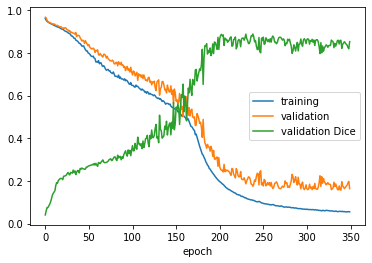

In [12]:
plt.plot(train_loss, label="training")
plt.plot(val_loss, label="validation")
plt.plot(val_metrics, label="validation Dice")
plt.xlabel("epoch")
plt.legend()

#### choose epoch 203 for evaluation
##### test data
based on val loss flattening around this time

In [13]:
inference_parameters_test_0 = {"model_dir": training_params_0["model_dir"], 
                         "model_epoch": 203,
                         "test_images": data_dict["test_images"],
                         "test_gt": data_dict["test_gt"], 
                         "save_dir": os.path.join(training_params_0["model_dir"], "test_pred_epoch_203")}

In [14]:
run_inference(**inference_parameters_test_0)

finished inference


In [17]:
inference_parameters_training_0 = {"model_dir": training_params_0["model_dir"], 
                         "model_epoch": 203,
                         "test_images": data_dict["training_images"],
                         "test_gt": data_dict["training_gt"], 
                         "save_dir": os.path.join(training_params_0["model_dir"], "training_pred_epoch_203")}

run_inference(**inference_parameters_training_0)

finished inference


In [18]:
inference_parameters_glaucoma_0 = {"model_dir":training_params_0["model_dir"], 
                         "model_epoch": 203,
                         "test_images": glaucoma_images,
                         "test_gt": glaucoma_gt, 
                         "save_dir": os.path.join(training_params_0["model_dir"], "glaucoma_pred_epoch_203")}

run_inference(**inference_parameters_glaucoma_0)

finished inference


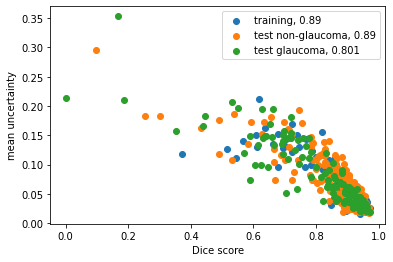

In [25]:
eval_dict_0 = {"gt_dir_ng": gt_dir_ng,
             "gt_dir_g": gt_dir_g, 
             "pred_dir_training": os.path.join(training_params_0["model_dir"], "training_pred_epoch_203"),
             "pred_dir_test": os.path.join(training_params_0["model_dir"], "test_pred_epoch_203"), 
             "pred_dir_g": os.path.join(training_params_0["model_dir"], "glaucoma_pred_epoch_203"), 
             "sampling": False}

dice_seed_0_eval = eval_mean_uncertainty(**eval_dict_0)